# Globular cluster tidal and Hill radii

Figure 9.7 from Chapter 9 of Ryden, *Celestial and Stellar Dynamics*, Cambridge University Press.

Fitted truncation radius $r_t$ of a King model versus computed Hill radius $r_{\rm H}$ for a sample of
80 globular clusters.  Data are from Harris 1996, Baumgardt & Hilker 2018, Baumgardt et al. 2019]

Plot a solid line representing $r_t = r_{\rm H}$, and dashed dashed lines that are $r_t = r_{\rm H}/2$ and
$r_t = 2 r_{\rm H}$.

Data are in a CSV-format file named `GC_rt_rh.csv`.

In [5]:
%matplotlib inline

import math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, LogLocator, NullFormatter

import warnings
warnings.filterwarnings('ignore',category=UserWarning, append=True)
warnings.filterwarnings('ignore',category=RuntimeWarning, append=True)

## Standard Plot Format

Setup the standard plotting format and make the plot.  

In [6]:
plotFile = 'Fig9_7.png' 

# graphic aspect ratio = width/height

aspect = 1.0 

#
# Don't change these unless you really need to (we never have)
#
# fPage is the horizontal fraction of the page occupied by the figure, default 1.0
#
# scaleFac is the LaTeX includegraphics scaling in units of \textwidth, default 1.0
#

fPage = 1.0
scaleFac = 0.85

# Text width in inches - don't change, this is defined by the print layout

textWidth = 6.0 # inches

figFmt = 'png'
dpi = 600
plotWidth = dpi*fPage*textWidth
plotHeight = plotWidth/aspect
axisFontSize = 12
labelFontSize = 10
lwidth = 0.5
axisPad = 5
wInches = fPage*textWidth # float(plotWidth)/float(dpi)
hInches = wInches/aspect  # float(plotHeight)/float(dpi)

# LaTeX is used throughout for markup of symbols, Times-Roman serif font

plt.rc('text', usetex=True)
plt.rc('font', **{'family':'serif','serif':['Times-Roman'],'weight':'bold','size':'16'})

# Font and line weight defaults for axes

matplotlib.rc('axes',linewidth=lwidth)
matplotlib.rcParams.update({'font.size':axisFontSize})

# axis and label padding

plt.rcParams['xtick.major.pad']=f'{axisPad}'
plt.rcParams['ytick.major.pad']=f'{axisPad}'
plt.rcParams['axes.labelpad'] = f'{axisPad}'

## Data and computations

CSV text file the observed data for the fitted tidal radii $r_t$ and the computed Hill radii $r_H$. 
We select two data points:
 * `r_tpc` - tidal radius in parsecs
 * `r_H` - Hill radius in parsecs

Also set values for globular cluster Pal 14 which has notably discrepant values.

In [7]:
dataFile = 'GC_rt_rh.csv'

data = pd.read_csv(dataFile,comment='#')

IDs = np.array(data['ID'])
r_t = np.array(data['r_tpc'])
r_H = np.array(data['r_H'])

# plotting limits

rMin = 3.0
rMax = 300

# data for Pal 14 - discrepant point we want to highlight

iPal14 = np.where(IDs == 'Pal 14')[0]
rt_Pal14 = r_t[iPal14]
rH_Pal14 = r_H[iPal14]

### Figure 9.7

Plot the data as open circles except for Pal 14 which we plot as a filled black circle with the cluster name
appended on log-log axes.

Also plot lines of $r_t=r_H$, $r_t=2 r_H$, and $r_t = r_H/2$

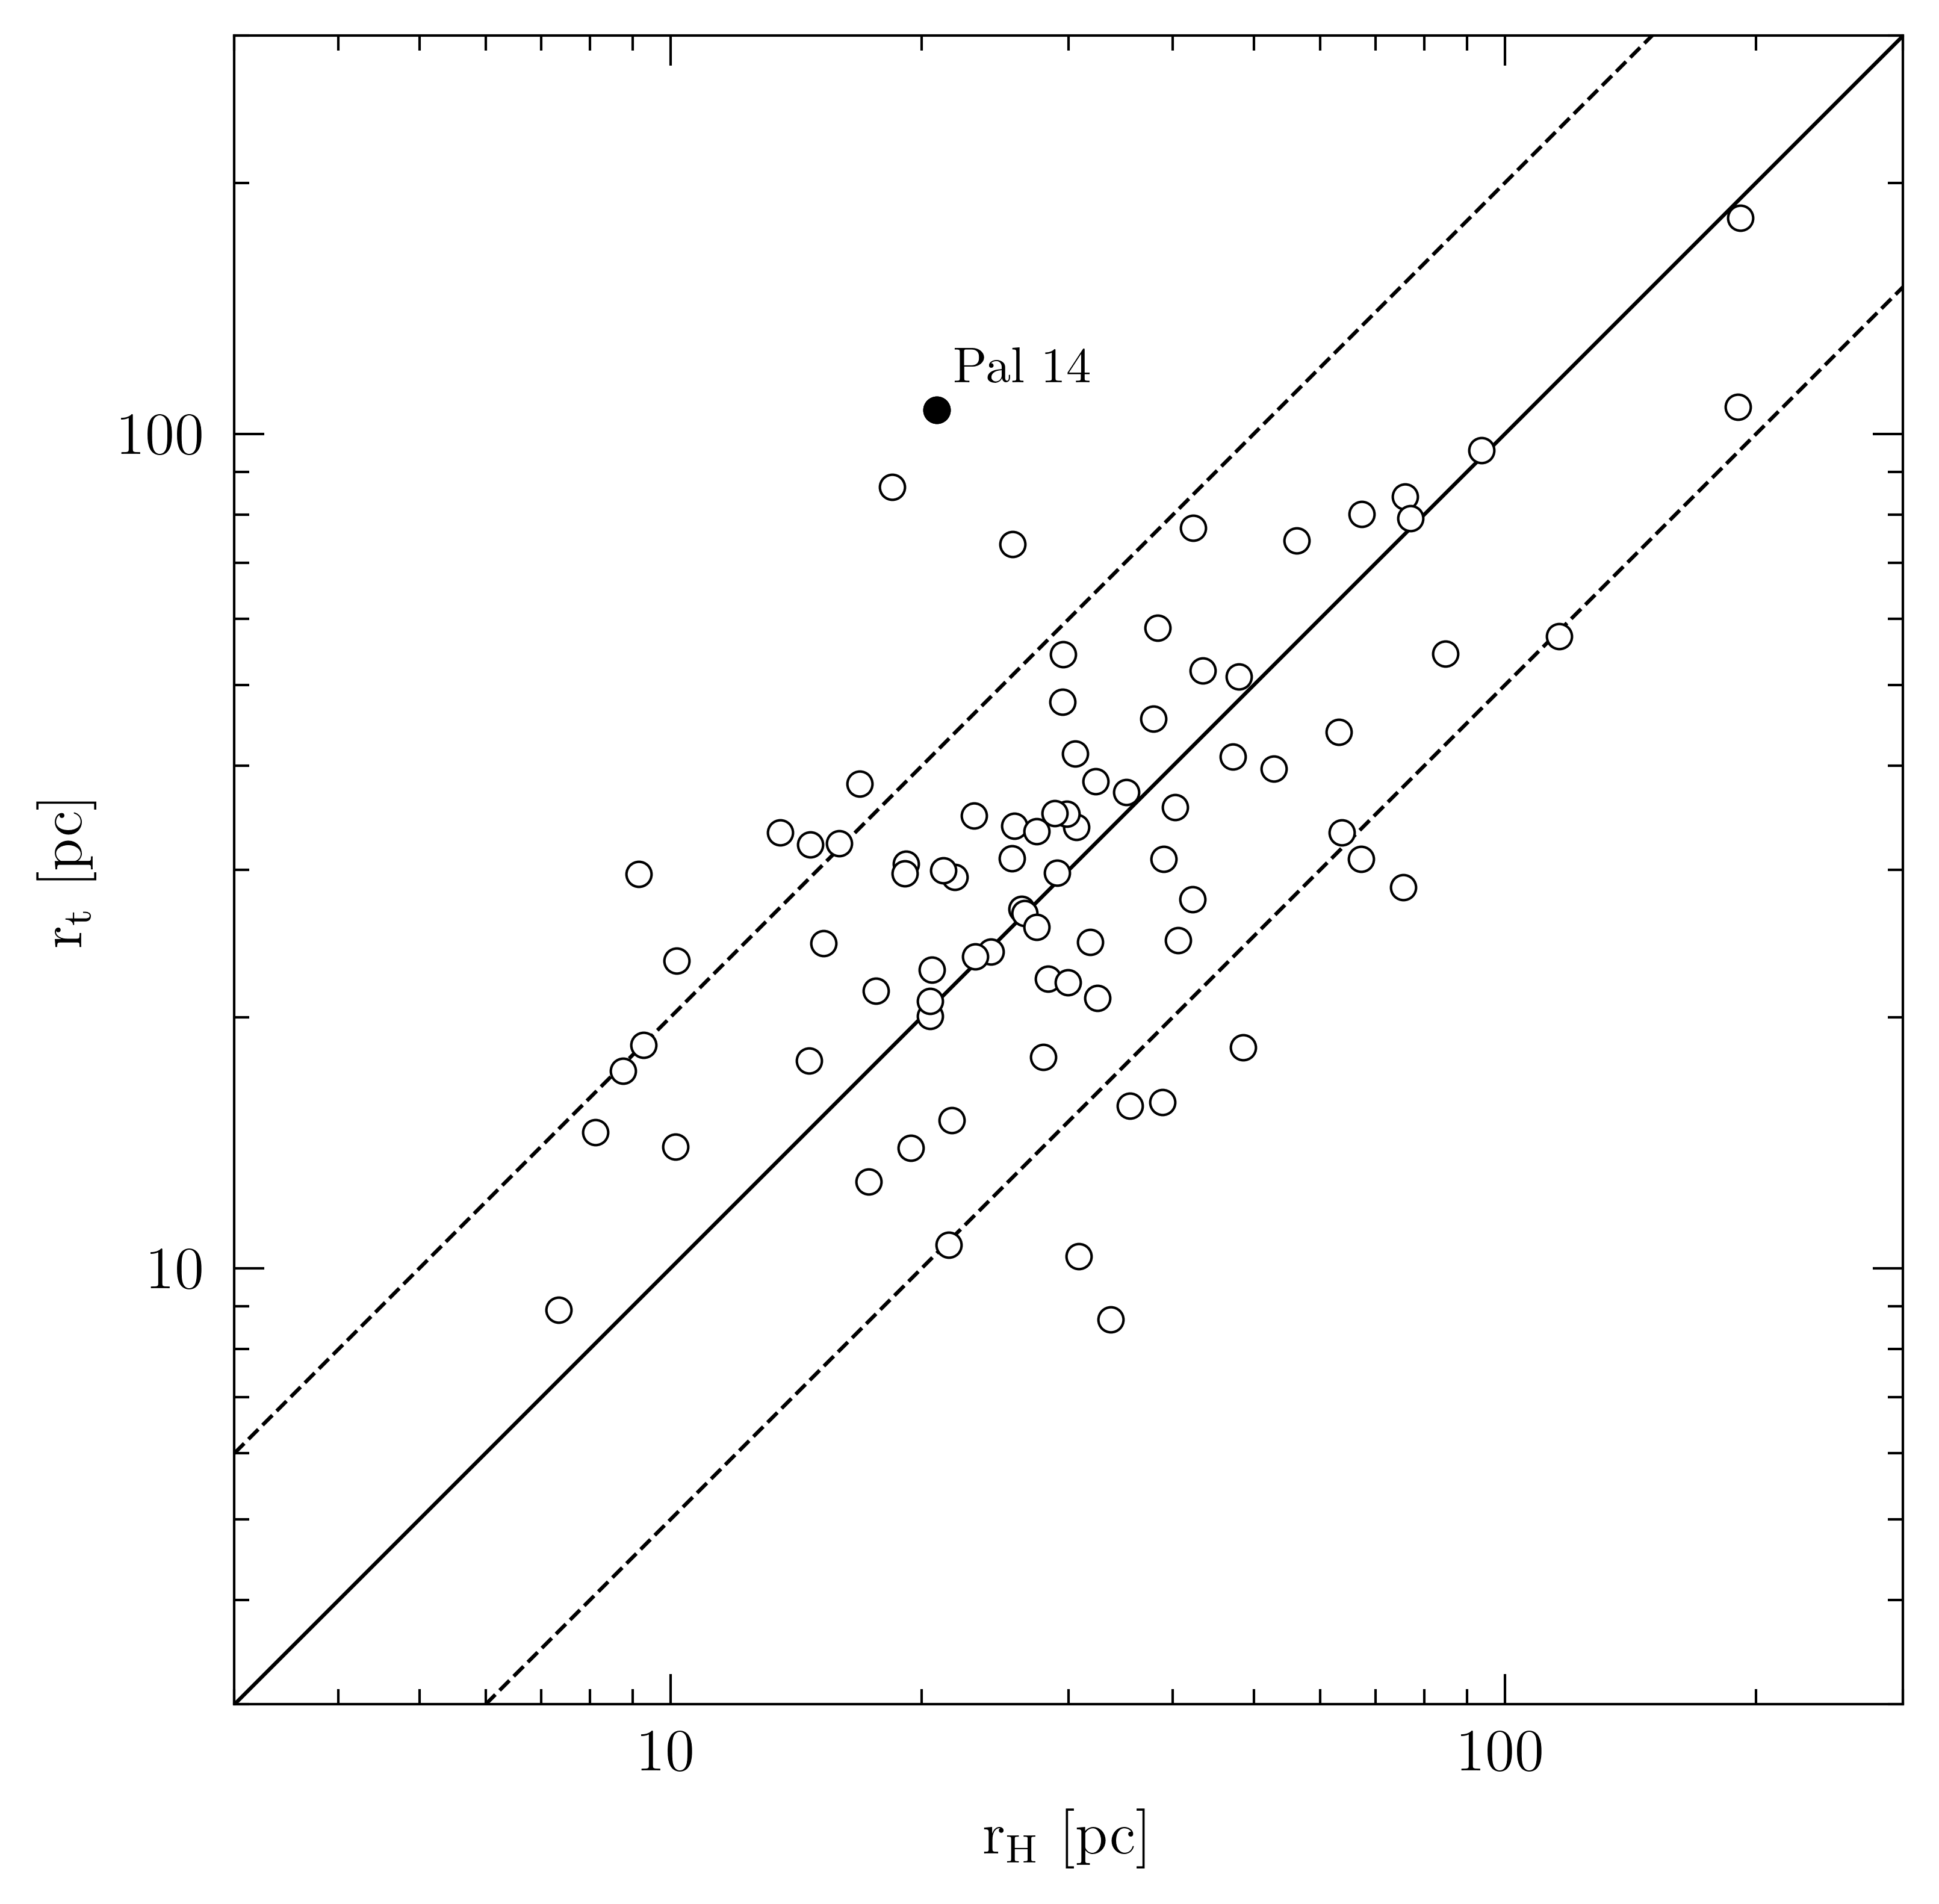

In [8]:
fig,ax = plt.subplots(figsize=(wInches,hInches),dpi=dpi)

ax.tick_params('both',length=6,width=lwidth,which='major',direction='in',top='on',right='on')
ax.tick_params('both',length=3,width=lwidth,which='minor',direction='in',top='on',right='on')

ax.set_aspect('equal')

# Limits

ax.set_xlim(rMin,rMax)
ax.set_xscale('log')
ax.xaxis.set_major_locator(LogLocator(base=10.0,subs=(1.0,),numticks=100))
ax.xaxis.set_minor_locator(LogLocator(base=10.0,subs=np.arange(2,10)*0.1,numticks=100))
ax.xaxis.set_minor_formatter(NullFormatter())
ax.set_xticks([10,100])
ax.set_xticklabels(['10','100'])
ax.set_xlabel(r'r$_{\rm H}$ [pc]',fontsize=axisFontSize)

ax.set_ylim(rMin,rMax)
ax.set_yscale('log')
ax.yaxis.set_major_locator(LogLocator(base=10.0,subs=(1.0,),numticks=100))
ax.yaxis.set_minor_locator(LogLocator(base=10.0,subs=np.arange(2,10)*0.1,numticks=100))
ax.yaxis.set_minor_formatter(NullFormatter())
ax.set_yticks([10,100])
ax.set_yticklabels(['10','100'])
ax.set_ylabel(r'r$_{\rm t}$ [pc]',fontsize=axisFontSize)

ax.plot(r_H,r_t,'o',mfc='white',mec='black',ms=5,mew=0.5,zorder=9)

ax.plot(rH_Pal14,rt_Pal14,'o',mfc='black',mec='black',ms=5,mew=0.5,zorder=10)
ax.text(1.05*rH_Pal14,1.05*rt_Pal14,'Pal 14',ha='left',va='bottom',fontsize=labelFontSize)
# equal, 2x and 1/2 lines

ax.plot([rMin,rMax],[rMin,rMax],'-',lw=0.75,color='black',zorder=8)
ax.plot([rMin,rMax],[2*rMin,2*rMax],'--',lw=0.75,color='black',zorder=8)
ax.plot([2*rMin,2*rMax],[rMin,rMax],'--',lw=0.75,color='black',zorder=8)

plt.plot()
plt.savefig(plotFile,bbox_inches='tight',facecolor='white')